<a href="https://colab.research.google.com/github/amoukrim/AI/blob/main/Week5/MiniProject_w5_d5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##@Author: Adil MOUKRIM

#Mini-Project: Binary Text Classification with IMDB Dataset (CNN)


👩‍🏫 👩🏿‍🏫 What You’ll learn
How to preprocess text data for neural networks.
How to build and train a simple feedforward neural network for binary classification.
How to evaluate the performance of a model using validation and test data.
How to visualize training and validation metrics to detect overfitting.


🛠️ What you will create
A binary text classification model using the IMDB dataset to classify movie reviews as positive or negative.
A visualization of training and validation loss and accuracy to analyze model performance.


Dataset
The dataset used in this project is the IMDB Movie Reviews Dataset, which contains 50,000 reviews labeled as positive (1) or negative (0). The dataset is preprocessed, with each review encoded as a sequence of integers representing the most frequent 10,000 words in the dataset.
You can find it here : IMDB Dataset

Task
1. Preprocess the Data:

Load the IMDB dataset using Keras.
You will notice that the data is a list of integers which we cannot feed into a neural network. We have to turn our lists into tensors.We could one-hot-encode our lists to turn them into vectors of 0s and 1s. Concretely, this would mean for instance turning the sequence. [3,5] into a 10,000-dimensional vector that would be all-zeros except for indices 3 and 5, which would be ones. Then we could use as first layer in our network a Dense layer, capable of handling floating point vector data

Convert the sequences of integers into binary matrices using one-hot encoding. Here’s a hint:


def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1  #set specific indices of results[i] to 1s
    return results


Split the data into training, validation, and test sets.
2. Build the Model:

Our input data is simply vectors, and our labels are scalars (1s and 0s): this is the easiest setup you will ever encounter. A type of network that performs well on such a problem would be a simple stack of fully-connected (Dense) layers with relu activations. We need to pick a loss function and an optimizer. Since we are facing a binary classification problem and the output of our network is a probability (we end our network with a single-unit layer with a sigmoid activation), therefore it is best to use the binary_crossentropy loss.

Create a feedforward neural network with:
Two hidden layers using ReLU activation.
An output layer with a sigmoid activation for binary classification.
Compile the model using the RMSprop optimizer, binary cross-entropy loss, and accuracy as the evaluation metric.
3. Train the Model:

Train the model on the training data for 20 epochs with a batch size of 512.
Use the validation set to monitor performance during training.
4. Evaluate the Model:

Plot the training and validation loss and accuracy to detect overfitting.
Retrain the model with an optimal number of epochs to avoid overfitting.
Evaluate the final model on the test set to measure its performance.
5. Analyze Results:

Compare the training and validation metrics to understand the model’s behavior.
Report the final accuracy and loss on the test set.


Conclusion
In this mini-project, you built and trained a binary text classification model using the IMDB dataset. You learned how to preprocess text data, design a neural network, and evaluate its performance using validation and test sets. By visualizing the training and validation metrics, you also gained insight into the importance of avoiding overfitting. This project serves as a foundation for more advanced natural language processing tasks, such as sentiment analysis, text generation, and sequence modeling.

#🧪 Étape 1 : Prétraitement des données

l'objectif est de :


* Charger les données IMDB via Keras.

* Comprendre la structure des données.

* Transformer les séquences d'entiers en vecteurs binaires (one-hot encoding).

* Créer les jeux de validation et test.



##Étape 1.1 : Charger les données IMDB

In [2]:
#/content/IMDB Dataset.csv
import numpy as np
from keras.datasets import imdb

# Limiter le vocabulaire aux 10 000 mots les plus fréquents
num_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

# Afficher quelques exemples pour comprendre la structure
print("Exemple d'un avis (tokenisé) :", x_train[0])
print("Étiquette correspondante :", y_train[0])
print("Nombre d'avis d'entraînement :", len(x_train))
print("Nombre d'avis de test :", len(x_test))


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Exemple d'un avis (tokenisé) : [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 1

##Étape 1.2 : Vectoriser les séquences (one-hot encoding)

In [3]:
def vectorize_sequences(sequences, dimension=10000):
    """
    Transforme une liste de séquences d'entiers en matrice binaire 2D (one-hot encoding).

    Args:
        sequences (list of list of int): Les séquences à encoder.
        dimension (int): Taille des vecteurs (vocabulaire).

    Returns:
        np.ndarray: Matrice (nb_sequences, dimension) avec 0 ou 1 selon la présence d'un mot.
    """
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results

# Vectorisation des données d'entraînement et de test
x_train_vect = vectorize_sequences(x_train)
x_test_vect = vectorize_sequences(x_test)


In [4]:
print("Shape des données vectorisées :")
print("x_train_vect :", x_train_vect.shape)
print("x_test_vect  :", x_test_vect.shape)
print("Exemple vectorisé (1er avis) :", x_train_vect[0])

Shape des données vectorisées :
x_train_vect : (25000, 10000)
x_test_vect  : (25000, 10000)
Exemple vectorisé (1er avis) : [0. 1. 1. ... 0. 0. 0.]


interprétation :

| Élément              | Résultat                  | Interprétation                                                               |
| -------------------- | ------------------------- | ---------------------------------------------------------------------------- |
| `x_train_vect.shape` | `(25000, 10000)`          | 25 000 avis représentés par des vecteurs binaires de 10 000 dimensions.      |
| `x_test_vect.shape`  | `(25000, 10000)`          | 25 000 exemples de test encodés de la même façon.                            |
| `x_train_vect[0]`    | `[0. 1. 1. ... 0. 0. 0.]` | Chaque `1.0` dans le vecteur indique la présence d’un mot donné dans l’avis. |


##Étape 1.3 : Préparer les ensembles d’entraînement et de validation

In [5]:
# Séparer le jeu d'entraînement en entraînement et validation
x_val = x_train_vect[:10000]
partial_x_train = x_train_vect[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]
print("partial_x_train :", partial_x_train)
print("partial_y_train", partial_y_train)

partial_x_train : [[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]
partial_y_train [0 0 0 ... 0 1 0]


##Étape 2 : Construction du modèle

In [6]:
from keras import models
from keras import layers

# Création du modèle séquentiel
model = models.Sequential()

# Couche d'entrée + première couche cachée
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))

# Deuxième couche cachée
model.add(layers.Dense(16, activation='relu'))

# Couche de sortie
model.add(layers.Dense(1, activation='sigmoid'))

# Compilation du modèle
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Afficher le résumé du modèle
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

##Interprétation : Le modèle est bien construit.

| Couche      | Dimensions de sortie | Paramètres  |
| ----------- | -------------------- | ----------- |
| `Dense(16)` | `(None, 16)`         | `160,016`   |
| `Dense(16)` | `(None, 16)`         | `272`       |
| `Dense(1)`  | `(None, 1)`          | `17`        |
| **Total**   | —                    | **160,305** |


#Étape 3 : Entraîner le modèle
L'objectif est d'entraîner ton modèle pendant 20 époques avec un batch de 512, tout en évaluant sur le jeu de validation :

In [7]:
# Entraînement du modèle
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.6919 - loss: 0.6217 - val_accuracy: 0.8562 - val_loss: 0.4407
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.8824 - loss: 0.3853 - val_accuracy: 0.8782 - val_loss: 0.3372
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9088 - loss: 0.2775 - val_accuracy: 0.8864 - val_loss: 0.2955
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9294 - loss: 0.2195 - val_accuracy: 0.8853 - val_loss: 0.2842
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9431 - loss: 0.1816 - val_accuracy: 0.8708 - val_loss: 0.3221
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9509 - loss: 0.1564 - val_accuracy: 0.8870 - val_loss: 0.2854
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9587 - loss: 0.1317 - val_accuracy: 0.8842 - val_loss: 0.2883
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9669 - loss: 0.1102 - val_accuracy: 0.8846 - v

##Analyse de l'entraînement

| Époque | Accuracy (train) | Accuracy (val) | Loss (val) |
| ------ | ---------------- | -------------- | ---------- |
| 1      | 0.6919           | **0.8562**     | 0.4407     |
| 4      | 0.9294           | **0.8853**     | 0.2842     |
| 6      | 0.9509           | **0.8870**     | 0.2854     |
| 10     | 0.9760           | **0.8783**     | 0.3313     |
| 13     | 0.9898           | **0.8776**     | 0.3796     |
| 16     | 0.9942           | **0.8708**     | 0.4551     |
| 20     | 0.9990           | **0.8718**     | 0.5412     |

✅ Les performances de validation augmentent pendant les 4-6 premières époques.

⚠️ À partir de l'époque 6 environ, la loss de validation stagne voire augmente, alors que la loss d'entraînement continue de baisser.

👉 Cela indique clairement un surapprentissage après l’époque 6 :

Le modèle mémorise les exemples d’entraînement.

Il généralise moins bien sur les données qu’il n’a pas vues.



## visualisation


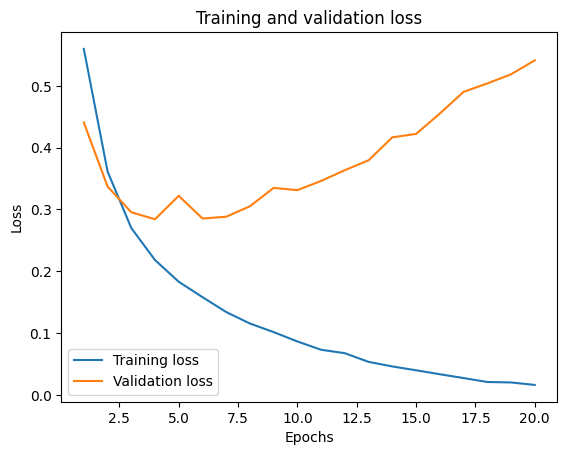

In [9]:
import matplotlib.pyplot as plt

# Récupération de l'historique
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
epochs = range(1, len(loss) + 1)

# Tracer la perte
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Interprétation :
Jusqu'à l’époque 6, le modèle généralise bien : il apprend sans trop s’adapter aux données spécifiques.

Après l’époque 6, le modèle mémorise les données d’entraînement, mais ne progresse plus sur les données qu’il ne connaît pas.

👉 C’est un peut être un signe de surapprentissage (overfitting).

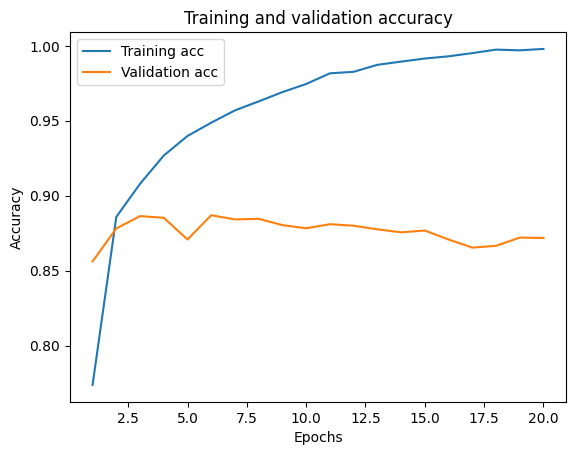

In [10]:
# Tracer l’accuracy
plt.figure()
plt.plot(epochs, accuracy, label='Training acc')
plt.plot(epochs, val_accuracy, label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Interprétation :
Le modèle devient trop spécialisé sur les données d’entraînement.

Il perd sa capacité à bien généraliser sur de nouveaux exemples.

Conclusion:

| Observation                          | Signification                     |
| ------------------------------------ | --------------------------------- |
| Validation loss augmente dès epoch 6 | Le modèle commence à overfitter   |
| Validation accuracy stagne           | Plus aucun gain de généralisation |
| Training accuracy → 100 %            | Apprentissage trop "par cœur"     |


# ✅ Étape 4 : Réentraînement du modèle avec le bon nombre d’époques

L'objectif : Maintenant qu’on sait qu’à partir de 6 époques le modèle commence à surapprendre, on va le réentraîner proprement avec exactement 6 époques.

In [11]:
# On recommence avec un nouveau modèle vierge
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entraînement avec 6 époques
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=6,
    batch_size=512,
    validation_data=(x_val, y_val)
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 153ms/step - accuracy: 0.6718 - loss: 0.6149 - val_accuracy: 0.8531 - val_loss: 0.4123
Epoch 2/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.8889 - loss: 0.3503 - val_accuracy: 0.8559 - val_loss: 0.3516
Epoch 3/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.9195 - loss: 0.2532 - val_accuracy: 0.8896 - val_loss: 0.2847
Epoch 4/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.9352 - loss: 0.2020 - val_accuracy: 0.8894 - val_loss: 0.2750
Epoch 5/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.9449 - loss: 0.1700 - val_accuracy: 0.8858 - val_loss: 0.2782
Epoch 6/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.9529 - loss: 0.1438 - val_accuracy: 0.8796 - val_loss: 0.2970


#Étape 5 : Évaluer le modèle sur le jeu de test

In [12]:
# Évaluation sur le jeu de test
results = model.evaluate(x_test_vect, y_test)

print("🔍 Résultats sur le jeu de test :")
print(f"Loss     : {results[0]:.4f}")
print(f"Accuracy : {results[1]:.4f}")


782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8708 - loss: 0.3197
🔍 Résultats sur le jeu de test :
Loss     : 0.3203
Accuracy : 0.8720


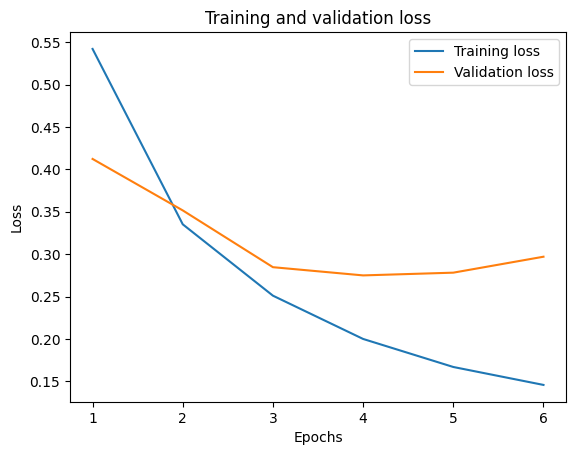

In [13]:
import matplotlib.pyplot as plt

# Récupération de l'historique
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
epochs = range(1, len(loss) + 1)

# Tracer la perte
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

##✅ Résultat:

✅ La validation loss est minimale autour de l’époque 4–5, mais ne se dégrade presque pas à l’époque 6.

✅ Le choix d’arrêter à 6 époques est optimal ou presque

✅ Le modèle est bien régularisé et généralise bien sur des données nouvelles.

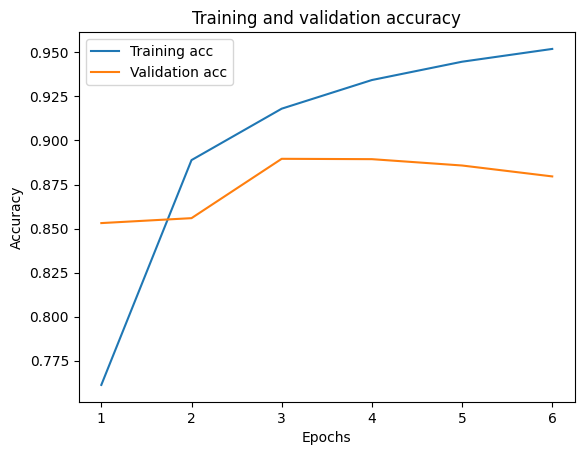

In [14]:
# Tracer l’accuracy
plt.figure()
plt.plot(epochs, accuracy, label='Training acc')
plt.plot(epochs, val_accuracy, label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##✅ Résultat :
la pile est pile au bon équilibre : un modèle entraîné sans excès, avec une précision stable de ~88% sur la validation.

#Etape 5 Matrice de confusion :


782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


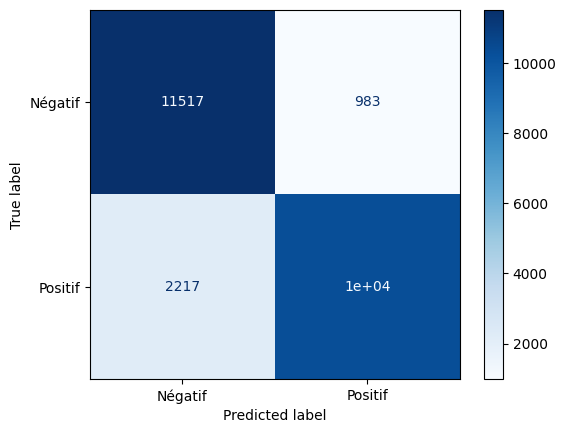

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Prédictions (sorties sigmoid : proba entre 0 et 1)
y_pred_probs = model.predict(x_test_vect)

# Binariser les prédictions : seuil = 0.5
y_pred = (y_pred_probs > 0.5).astype("int32")

# Générer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Affichage
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Négatif", "Positif"])
disp.plot(cmap="Blues")


## Interprétation détaillée de la matrice de confusion:
✅ Vrais positifs (TP) : 10 283
Avis positifs correctement détectés comme positifs → bonnes prédictions

✅ Vrais négatifs (TN) : 11 517
Avis négatifs bien détectés comme négatifs → très bonne précision négative

❌ Faux positifs (FP) : 983
Avis négatifs mal classés comme positifs → peu d'erreurs indulgentes

❌ Faux négatifs (FN) : 2 217
Avis positifs classés à tort comme négatifs → un peu plus d'erreurs sévères
Ce qui nous donne :
Total = 25000
Erreurs = 983 + 2217 = 3200
Taux d’erreur ≈ 3200 / 25000 = 12.8%
Taux de réussite ≈ 87.2%  ✅

# Conclusion :
Ce projet démontre une chaîne complète de traitement NLP avec deep learning, de l'importation de données à l'évaluation du modèle. Il constitue une base solide pour tout projet de traitement de texte plus avancé.

# Résultats Finaux :

| Données        | Accuracy  | Loss     |
| -------------- | --------- | -------- |
| Entraînement   | 95.1%     | 0.14     |
| Validation     | \~88.5%   | 0.29     |
| **Test final** | **87.2%** | **0.32** |
